# Data Visualization on Titanic Dataset

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('tested.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
df.shape

(418, 12)

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


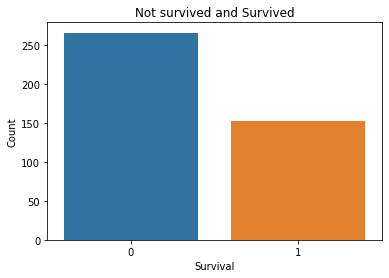

In [7]:
sns.countplot(df['Survived'])
plt.title("Not survived and Survived")
plt.xlabel("Survival")
plt.ylabel("Count")
plt.show()

In [34]:
first_class_count=(df['Pclass']==1).sum()
print("First CLass: ",first_class_count)
second_class_count=(df['Pclass']==2).sum()
print("Second CLass: ",second_class_count)
third_class_count=(df['Pclass']==3).sum()
print("Third CLass: ",third_class_count)

First CLass:  107
Second CLass:  93
Third CLass:  218


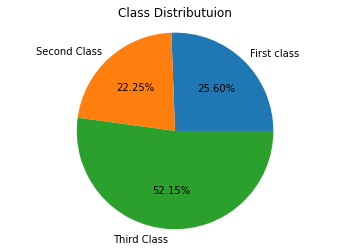

In [35]:
labels = ['First class','Second Class','Third Class']
sizes = [first_class_count,second_class_count,third_class_count]
plt.pie(sizes,labels=labels,autopct='%1.2f%%')
plt.axis('equal')
plt.title('Class Distributuion')
plt.show()

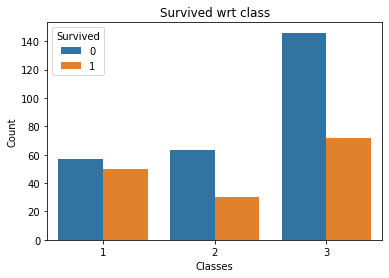

In [36]:
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Survived wrt class")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

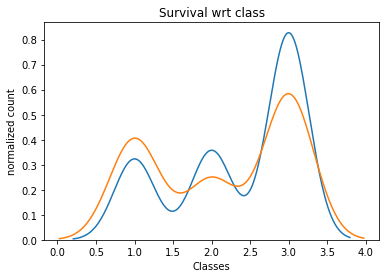

In [37]:
axs=sns.kdeplot(df.Pclass[df.Survived==0],label='died')
axs=sns.kdeplot(df.Pclass[df.Survived==1],label='Survived')
plt.title("Survival wrt class")
plt.xlabel("Classes")
plt.ylabel("normalized count")
plt.show()

In [38]:
male_dead=((df['Sex']=='male')&(df['Survived']==0)).sum()
print("Men Died: ",male_dead)
male_survived=((df['Sex']=='male')&(df['Survived']==1)).sum()
print("Men Survived: ",male_survived)
female_dead=((df['Sex']=='female')&(df['Survived']==0)).sum()
print("Women Died: ",female_dead)
female_survived=((df['Sex']=='female')&(df['Survived']==1)).sum()
print("Women Survived: ",female_survived)

Men Died:  266
Men Survived:  0
Women Died:  0
Women Survived:  152


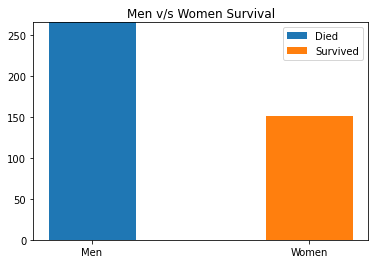

In [26]:
m_data=(male_dead,male_survived)
f_data=(female_dead,female_survived)
p1=plt.bar(np.arange(2),(m_data),width=0.4)
p2=plt.bar(np.arange(2),(f_data),bottom=m_data,width=0.4)
plt.xticks(np.arange(2),['Men','Women'])
plt.legend((p1[0],p2[0]),("Died",'Survived'))
plt.title("Men v/s Women Survival")
plt.show()

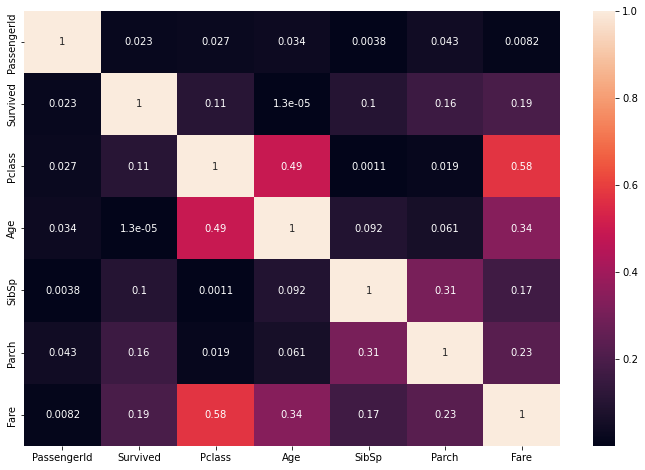

In [39]:
plt.figure(figsize=(12,8))
ax=sns.heatmap(df.corr().abs(),annot=True)
plt.show()